In [1]:
import pandas as pd

stox_1 = pd.read_csv('/Users/bengould/Documents/GitHub/code-22/Untitled/FinanceDataProject/Equity Valuation CSVs/MSCIEmergingMarketsPBRatio.csv')
stox_2 = pd.read_csv('/Users/bengould/Documents/GitHub/code-22/Untitled/FinanceDataProject/Equity Valuation CSVs/MSCIEuropePBRatio.csv')
stox_3 = pd.read_csv('/Users/bengould/Documents/GitHub/code-22/Untitled/FinanceDataProject/Equity Valuation CSVs/SP500PBRatio.csv')

'2020-02-24'

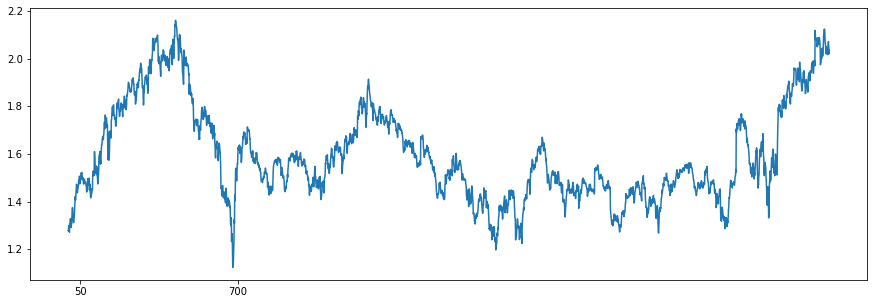

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(stox_1.index, stox_1[' MSCI EM P/B Ratio'])
plt.xticks([50,700])
#stox_1.at[50,'Date']
stox_1.at[700,'Date']

In [187]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [15]:
stox_1

,Date,MSCI EM P/B Ratio
0,2022-10-31,1.2785
1,2022-10-28,1.2766
2,2022-10-27,1.2992
3,2022-10-26,1.2852
4,2022-10-25,1.2742
...,...,...
3141,2010-10-15,2.0607
3142,2010-10-14,2.0715
3143,2010-10-13,2.0544
3144,2010-10-12,2.0199


In [188]:
dates = intersection(stox_1['Date'], stox_3['Date'])

In [242]:
stox_1 = stox_1[stox_1['Date'].isin(dates)]
stox_2 = stox_2[stox_2['Date'].isin(dates)]
stox_3 = stox_3[stox_3['Date'].isin(dates)]

In [297]:
stox_3

,Date,S&P 500 Index P/B Ratio,Volume,SMAVG (15)
0,2022-10-31,3.8810,846660160,740898368.0
1,2022-10-28,3.9101,743160640,724724544.0
2,2022-10-27,3.8161,831854592,725741632.0
3,2022-10-26,3.8395,760715392,713486976.0
4,2022-10-25,3.8681,705721792,705495424.0
...,...,...,...,...
3031,2010-10-15,2.0691,1280746368,NaN
3032,2010-10-14,2.0648,1014837888,NaN
3033,2010-10-13,2.0748,1117302016,NaN
3034,2010-10-12,2.0601,784063488,NaN


In [ ]:
# i'm not sure if .rolling is appropriate for the indexing here. gonna do it by hand

In [191]:
diff_roll_1 = stox_1[' MSCI EM P/B Ratio'].diff().rolling(10, closed='left').mean().shift(-5,fill_value=0)
diff_roll_2 = stox_2['SMAVG (15)'].diff().rolling(10, closed='left').mean().shift(-5,fill_value=0)
diff_roll_3 = stox_3['SMAVG (15)'].diff().rolling(10, closed='left').mean().shift(-5,fill_value=0)
# shifts by 5 and rolls by 10 can both be CV'd for optimization

In [203]:
diff_1 = stox_1[' MSCI EM P/B Ratio'].diff().rolling(10, closed='left').mean()
df = pd.DataFrame({'date':stox_1['Date'], 'diff_roll': diff_1})

In [192]:
avg_1 = diff_roll_1.mean()
avg_2 = diff_roll_2.mean()
avg_3 = diff_roll_3.mean()

In [22]:
stox_1['diff'] = stox_1[' MSCI EM P/B Ratio'].diff()
stox_2['diff'] = stox_2['MSCI EU Index P/B ratio'].diff()
stox_3['diff'] = stox_3['S&P 500 Index P/B Ratio'].diff()

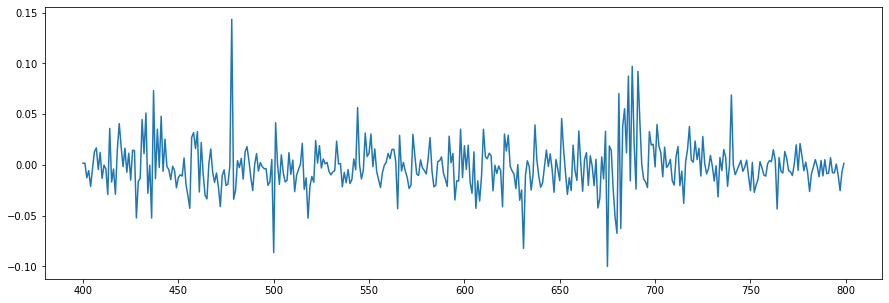

In [25]:
plt.figure(figsize=(15,5))
plt.plot(stox_1['diff'][400:800])

In [265]:
def roll(date, data, col, n):
    # data is a df
    # col is a column name in df
    
    index = data['Date'].loc[data['Date']==date].index.values[0]
    last_index = data.index[len(data)-1]
    
    if index + n < len(data):
        previous = data.loc[index:index+n]
        avg = np.sum(previous[col].values)/len(previous)
    else:
        previous = data.loc[index:last_index]
        avg = np.sum(previous[col].values)/len(previous)
        
    return avg

In [267]:
roll('2022-10-27', stox_1, ' MSCI EM P/B Ratio', 5)

1.29

In [295]:
r = stox_1[' MSCI EM P/B Ratio'].diff()
r

0          NaN
1      -0.0019
2       0.0226
3      -0.0140
4      -0.0110
         ...  
3141    0.0164
3142    0.0108
3143   -0.0171
3144   -0.0345
3145    0.0161
Name:  MSCI EM P/B Ratio, Length: 3036, dtype: float64

In [300]:
stox_1_roll = []
stox_2_roll = []
stox_3_roll = []

# indexes differ between stox df's. gonna do three separate loops

for index in stox_1.index:
    date = stox_1.at[index, 'Date']
    stox_1_roll.append(roll(date, stox_1, 'diff', 10))
    
for index in stox_2.index:
    date = stox_2.at[index, 'Date']
    stox_2_roll.append(roll(date, stox_2, 'diff', 10))
    
for index in stox_3.index:
    date = stox_3.at[index, 'Date']
    stox_3_roll.append(roll(date, stox_3, 'diff', 10))

In [301]:
stox = pd.DataFrame({'date':stox_1['Date'],
                     'stox_1_roll':stox_1_roll,
                     'stox_2_roll':stox_2_roll,
                     'stox_3_roll':stox_3_roll})

In [302]:
stox

,date,stox_1_roll,stox_2_roll,stox_3_roll
0,2022-10-31,NaN,NaN,NaN
1,2022-10-28,0.002382,-0.007555,-0.026327
2,2022-10-27,0.001345,-0.007791,-0.021064
3,2022-10-26,0.000773,-0.008627,-0.020982
4,2022-10-25,0.001900,-0.008200,-0.022173
...,...,...,...,...
3141,2010-10-15,-0.001660,-0.003880,-0.006340
3142,2010-10-14,-0.006175,-0.003625,-0.004200
3143,2010-10-13,-0.011833,-0.004900,-0.004167
3144,2010-10-12,-0.009200,-0.009050,-0.011250


In [193]:
import numpy as np

def almost_floor(a):
    if a >=0:
        inta = np.floor(a)
        deca = a - np.floor(a)
        
        if deca < .25:
            b = inta 
            return b
        elif deca >= .25 and deca < .5:
            b = inta + .25
            return b
        elif deca >= .5 and deca < .75:
            b = inta + .5
            return b
        else:
            b = inta + .75
            return b
        
    else:
        inta = np.ceil(a)
        deca = inta - a # positive!
        
        if deca < .25:
            b = inta 
            return b
        elif deca >= .25 and deca < .5:
            b = inta - .25
            return b
        elif deca >= .5 and deca < .75:
            b = inta - .5
            return b
        else:
            b = inta - .75
            return b

In [308]:
import statistics
avg_1 = statistics.mean(stox['stox_1_roll'].dropna())
avg_2 = statistics.mean(stox['stox_2_roll'].dropna())
avg_3 = statistics.mean(stox['stox_3_roll'].dropna())

sd_1 = statistics.stdev(stox['stox_1_roll'].dropna())
sd_2 = statistics.stdev(stox['stox_2_roll'].dropna())
sd_3 = statistics.stdev(stox['stox_3_roll'].dropna())

zscores_1 = []
zscores_2 = []
zscores_3 = []

for i in stox.index:
    if stox['stox_1_roll'][i] != 'NaN':
        z_bucket = almost_floor((stox['stox_1_roll'][i] - avg_1)/sd_1)
        zscores_1.append(z_bucket)
    else:
        zscores_1.append('NaN')
        
    if stox['stox_2_roll'][i] != 'NaN':
        z_bucket = almost_floor((stox['stox_2_roll'][i] - avg_2)/sd_2)
        zscores_2.append(z_bucket)
    else:
        zscores_2.append('NaN')
    
    if stox['stox_3_roll'][i] != 'NaN':
        z_bucket = almost_floor((stox['stox_3_roll'][i] - avg_3)/sd_3)
        zscores_3.append(z_bucket)
    else:
        zscores_3.append('NaN')

In [311]:
zscores_1_names = [str(a) for a in zscores_1]
zscores_2_names = [str(a) for a in zscores_2]
zscores_3_names = [str(a) for a in zscores_3]

In [316]:
stox = pd.DataFrame({'date': stox_1['Date'],
                     'zscore_1': zscores_1, 
                     'zscore_2': zscores_2,
                     'zscore_3': zscores_3,
                     'zscore_1_name':zscores_1_names,
                     'zscore_2_name':zscores_2_names,
                     'zscore_3_name':zscores_3_names})

In [317]:
stox

,date,zscore_1,zscore_2,zscore_3,zscore_1_name,zscore_2_name,zscore_3_name
0,2022-10-31,NaN,NaN,NaN,nan,nan,nan
1,2022-10-28,0.25,-1.25,-2.50,0.25,-1.25,-2.5
2,2022-10-27,0.00,-1.25,-2.00,0.0,-1.25,-2.0
3,2022-10-26,0.00,-1.25,-2.00,0.0,-1.25,-2.0
4,2022-10-25,0.25,-1.25,-2.00,0.25,-1.25,-2.0
...,...,...,...,...,...,...,...
3141,2010-10-15,-0.25,-0.50,-0.50,-0.25,-0.5,-0.5
3142,2010-10-14,-1.00,-0.50,-0.25,-1.0,-0.5,-0.25
3143,2010-10-13,-2.00,-0.75,-0.25,-2.0,-0.75,-0.25
3144,2010-10-12,-1.50,-1.50,-1.00,-1.5,-1.5,-1.0


In [90]:
# yay

<AxesSubplot:xlabel='zscore_3', ylabel='Count'>

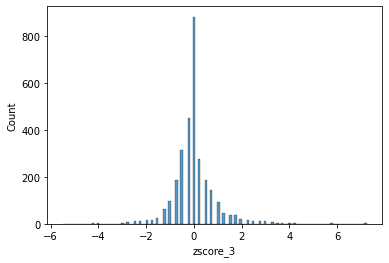

In [320]:
import seaborn as sns
sns.histplot(stox['zscore_3'])

In [321]:
from pathlib import Path  
filepath = Path('/Users/bengould/Documents/GitHub/code-22/Untitled/FinanceDataProject/stox_zscore_buckets.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
stox.to_csv(filepath)  

In [183]:
total_zscores = set(stox['zscore_1'].dropna()).union(set(stox['zscore_2'].dropna()).union(set(stox['zscore_3'].dropna())))
zscore_names = []
for a in total_zscores:
    zscore_names.append(str(a))

In [184]:
stox

,date,zscore_1,zscore_2,zscore_3
0,2014-06-20,NaN,NaN,NaN
1,2018-12-27,NaN,NaN,NaN
2,2011-04-18,NaN,NaN,NaN
3,2013-07-16,NaN,NaN,NaN
4,2011-11-29,NaN,NaN,NaN
...,...,...,...,...
3031,2022-07-15,-0.0,-0.0,-0.0
3032,2014-09-26,-0.0,-0.0,-0.0
3033,2015-11-30,-0.0,-0.0,-0.0
3034,2018-06-12,-0.0,-0.0,-0.0
